# Detección de Fraude Bancario con Machine Learning


El dataset utilizado corresponde a transacciones reales anonimizadas y es
ampliamente utilizado en la industria y en entornos académicos.
Las entidades financieras procesan diariamente millones de transacciones con tarjetas de crédito. Entre estas operaciones, una pequeña proporción corresponde a transacciones fraudulentas, las cuales generan pérdidas económicas significativas tanto para las instituciones como para los clientes.

Detectar el fraude de manera automática es un desafío relevante, ya que los patrones de comportamiento fraudulento evolucionan constantemente y suelen estar ocultos dentro de grandes volúmenes de datos legítimos. Además, los sistemas de detección deben minimizar los falsos positivos para no afectar negativamente la experiencia del usuario.

Desde el punto de vista del análisis de datos, este problema se caracteriza por un fuerte desbalance de clases, donde las transacciones fraudulentas representan una fracción mínima del total.

## Planteamiento del problema

El fraude bancario consiste en la realización de transacciones no autorizadas con el objetivo de obtener un beneficio económico. En los conjuntos de datos reales, este tipo de eventos es poco frecuente en comparación con las transacciones legítimas, lo que dificulta su detección mediante técnicas tradicionales de clasificación.

El principal desafío radica en construir modelos de Machine Learning capaces de identificar correctamente estas transacciones fraudulentas sin verse sesgados por la clase mayoritaria. En este contexto, métricas comunes como la exactitud (accuracy) resultan insuficientes, ya que un modelo puede obtener una alta accuracy prediciendo siempre la clase mayoritaria, pero fallar en la detección de fraudes.

Por lo tanto, es necesario emplear estrategias específicas para el manejo del desbalance de datos y evaluar los modelos mediante métricas adecuadas que prioricen la detección de la clase minoritaria.

## Objetivo del proyecto

- Construir modelos de Machine Learning para la clasificación de transacciones bancarias en fraudulentas y no fraudulentas.

- Analizar el impacto del desbalance de clases en el rendimiento de los modelos.

- Aplicar técnicas de manejo del desbalance de clases mediante ponderación de clases y evaluación con métricas adecuadas, asegurando una correcta representación de las clases a través de muestreo estratificado.

- Evaluar los modelos utilizando métricas adecuadas para datos desbalanceados, como precision, recall, F1-score y matriz de confusión.

- Comparar el desempeño de distintos algoritmos de clasificación supervisada.




## Contenido del Proyecto

Este notebook se encuentra organizado en las siguientes secciones:

1. **Introducción y objetivo del proyecto**  
   Se presenta el problema de detección de fraude bancario y la motivación del análisis.

2. **Información del dataset**  
   Se describe el origen del conjunto de datos, sus características principales y la variable objetivo.

3. **Análisis exploratorio de datos (EDA)**  
   Se analizan la distribución de las variables, el desbalance de clases y relaciones relevantes entre características.

4. **Preparación de los datos**  
   Se realiza la separación en conjuntos de entrenamiento y prueba, el escalado de variables y la definición de pipelines.

5. **Entrenamiento de modelos**  
   Se entrenan distintos modelos de Machine Learning: Regresión Logística, Árbol de Decisión y Random Forest.

6. **Evaluación de modelos**  
   Se comparan los modelos utilizando validación cruzada estratificada y métricas apropiadas para datos desbalanceados.

7. **Optimización de hiperparámetros**  
   Se ajustan los hiperparámetros del mejor modelo mediante RandomizedSearchCV.

8. **Evaluación final del sistema**  
   Se evalúa el modelo final sobre el conjunto de prueba y se analizan sus errores.

9. **Conclusiones**  
   Se presentan los resultados obtenidos y se discuten posibles mejoras futuras.


## Información del Dataset

### Origen del dataset

El conjunto de datos utilizado en este proyecto fue obtenido de la plataforma Kaggle y corresponde a un conjunto de transacciones reales con tarjetas de crédito, utilizadas habitualmente como benchmark para problemas de detección de fraude.

### Descripción general

El dataset contiene un total de 284.807 transacciones y 31 variables, incluyendo la variable objetivo.

Debido a razones de confidencialidad, la mayoría de las características han sido anonimizadas mediante Análisis de Componentes Principales (PCA), por lo que no poseen una interpretación directa desde el punto de vista del negocio.

### Variables

* V1 - V28: Variables numéricas resultantes de una transformación PCA aplicada a las características originales.

* Time: Número de segundos transcurridos entre cada transacción y la primera transacción registrada.

* Amount: Monto de la transacción.

* Class: Variable objetivo que indica si la transacción es fraudulenta (1) o legítima (0).

### Variable objetivo y desbalance

La variable objetivo Class presenta un fuerte desbalance de clases, ya que las transacciones fraudulentas representan una proporción muy reducida del total de observaciones.

Este desbalance constituye uno de los  principales desafíos del problema y justifica el uso de métricas como Recall, F1-score y ROC-AUC, así como técnicas como estratificacióny validación cruzada.

## Análisis Exploratorio de Datos (EDA)

### Importación de librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold, cross_validate

### Carga del dataset




In [ ]:
# Carga del dataset
# El dataset debe descargarse desde Kaggle:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

df = pd.read_csv("creditcard.csv")

In [ ]:
# Leer los datos
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Información general del dataset

In [ ]:
#Tamaño de la data
df.shape


(284807, 31)

In [ ]:
#Corroborar los nombres de las columnas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#Chequear duplicados
print(df.duplicated().sum())

1081


In [ ]:
#Remover duplicados
df=df.drop_duplicates()



In [ ]:
#volver a chequear duplicados
print(df.duplicated().sum())

0


In [ ]:
#Revisar valores nulos y tipo de datos.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

* No hay presencia de valores nulos en la data.

In [ ]:
#Se analizan medidas descriptivas como mínimo, máximo, media y desviación estándar con el objetivo de comprender los rangos de valores de cada variable y detectar posibles diferencias de escala entre ellas.

df.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
#Chequeamos la cantidad de elementos de cada categoría hay en cada la columna 'Class'
df['Class'].value_counts()


,count
Class,
0,283253
1,473


El dataset presenta un fuerte desbalance de clases: la gran mayoría de las
transacciones son normales, mientras que una proporción muy pequeña corresponde
a fraudes.

Este desbalance representa un desafío importante para los modelos de Machine
Learning, ya que métricas como la exactitud (accuracy) pueden resultar engañosas.


In [ ]:
#porcentaje de operaciones de cada clase
df['Class'].value_counts(normalize= True)*100

,proportion
Class,
0,99.83329
1,0.16671


Aquí es posible observar que menos del 0.2% de las transacciones son fraude, por lo cual el dataset está extremadamente desbalanceado.

**Visualización de la Variable objetivo ('Class')**:

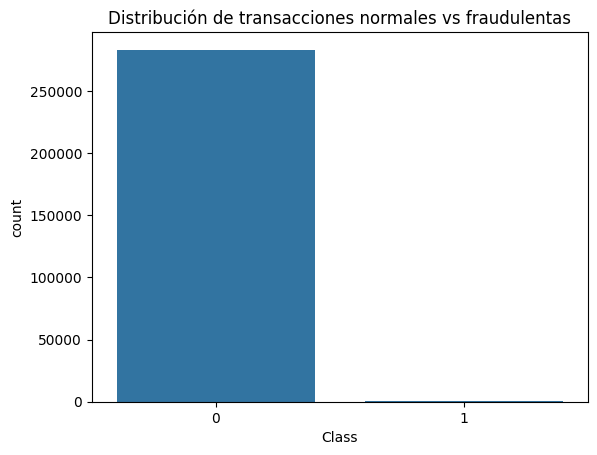

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Distribución de transacciones normales vs fraudulentas")
plt.show()


Los datos están claramente muy desbalancados, ya que la mayoría de las transacciones corresponden a No Fraude. Debidoa este fuerte desbalance, el modelode clasificación tenderá a sesgar sus predicciones hacia la clase mayoritaría (No Fraude). Por lo tanto, el balance de datos se convierte en una parte crucial para construir un modelo robusto.

### Análisis de correlación y relaciones entre variables

V17    0.313498
V14    0.293375
V12    0.250711
V10    0.206971
V16    0.187186
V3     0.182322
V7     0.172347
V11    0.149067
V4     0.129326
V18    0.105340
dtype: float64


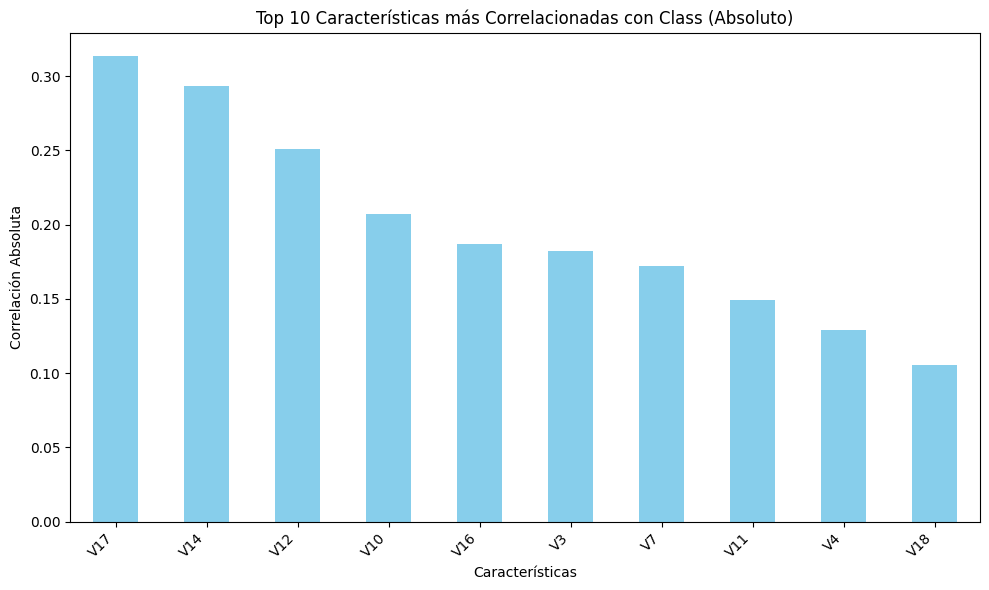

In [ ]:
import matplotlib.pyplot as plt

# 1. Calcular correlación
df_corr = abs(df.drop('Class', axis=1).corrwith(df['Class'])).sort_values(ascending=False)

# 2. Seleccionar el top 10
top10_corr = df_corr.head(10)
print(top10_corr)

# 3. Graficar
plt.figure(figsize=(10, 6)) # Tamaño del gráfico
top10_corr.plot(kind='bar', color='skyblue')
plt.title('Top 10 Características más Correlacionadas con Class (Absoluto)')
plt.ylabel('Correlación Absoluta')
plt.xlabel('Características')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se analizó la correlación absoluta entre las variables predictoras y la variable objetivo Class con el fin de identificar qué características están más relacionadas con el fraude. Los resultados muestran que las variables V17, V14 y V12 presentan las correlaciones más altas, aunque ningún atributo individual alcanza una correlación elevada.

Esto sugiere que el fraude no puede explicarse mediante una única variable, sino que depende de combinaciones complejas de características. Este comportamiento justifica el uso de modelos no lineales como Árboles de Decisión y Random Forest, los cuales pueden capturar interacciones complejas entre variables.

Asimismo, dado que las variables se encuentran anonimizadas, el análisis se enfoca en su relevancia estadística y no en su interpretación semántica.

In [ ]:
#agregar la matriz con scatter y la conclusion
# Seleccionar los nombres de las variables (los índices)
top_10_variables = top10_corr.index.tolist()
print("Top 10 variables:", top_10_variables)

Top 10 variables: ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


array([[<Axes: xlabel='V17', ylabel='V17'>,
        <Axes: xlabel='V14', ylabel='V17'>,
        <Axes: xlabel='V12', ylabel='V17'>,
        <Axes: xlabel='V10', ylabel='V17'>,
        <Axes: xlabel='V16', ylabel='V17'>,
        <Axes: xlabel='V3', ylabel='V17'>,
        <Axes: xlabel='V7', ylabel='V17'>,
        <Axes: xlabel='V11', ylabel='V17'>,
        <Axes: xlabel='V4', ylabel='V17'>,
        <Axes: xlabel='V18', ylabel='V17'>],
       [<Axes: xlabel='V17', ylabel='V14'>,
        <Axes: xlabel='V14', ylabel='V14'>,
        <Axes: xlabel='V12', ylabel='V14'>,
        <Axes: xlabel='V10', ylabel='V14'>,
        <Axes: xlabel='V16', ylabel='V14'>,
        <Axes: xlabel='V3', ylabel='V14'>,
        <Axes: xlabel='V7', ylabel='V14'>,
        <Axes: xlabel='V11', ylabel='V14'>,
        <Axes: xlabel='V4', ylabel='V14'>,
        <Axes: xlabel='V18', ylabel='V14'>],
       [<Axes: xlabel='V17', ylabel='V12'>,
        <Axes: xlabel='V14', ylabel='V12'>,
        <Axes: xlabel='V12', ylabel=

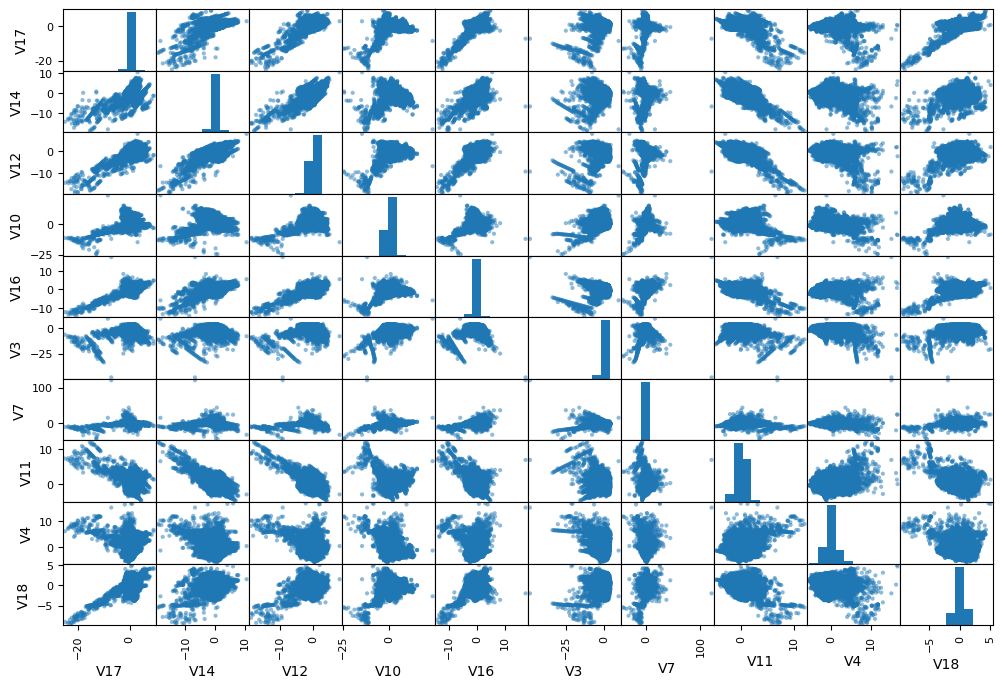

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[top_10_variables], figsize=(12,8))


### Hipótesis sobre la variable Amount

Desde una perspectiva de negocio, se planteó la hipótesis de que el monto de la
transacción (Amount) podría ser una variable relevante para la detección de fraude,
ya que transacciones con montos elevados podrían asociarse a un mayor riesgo de fraude.


## Preparación de datos para Machine Learning

En esta etapa se preparan los datos para ser utilizados por los distintos modelos de Machine Learning.
Se distinguen dos componentes fundamentales:

* Variables predictoras (X): conjunto de características que utiliza el modelo para realizar la predicción.

* Variable objetivo (y): variable que se desea predecir.

En este proyecto, la variable objetivo es Class, que indica si una transacción es fraudulenta (1) o no (0).

Dado que el conjunto de datos presenta un fuerte desbalance entre clases, se utiliza una partición estratificada para asegurar que tanto el conjunto de entrenamiento como el de prueba mantengan la misma proporción de fraudes.


### Separación de predictores y variable objetivo


In [ ]:
# División Train / Test (estratificada)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["Class"]
)


* Separa el dataset en entrenamiento (80%) y prueba (20%).

* stratify=df["Class"] mantiene la proporción de fraudes.

### División en conjunto de entrenamiento y prueba

In [ ]:
#separamos  los predictores y las etiquetas (target) ya que no necesariamente queremos aplicar las mismas transformaciones a los predictores y a la variable objetivo.
X_train = train_set.drop("Class", axis=1)
y_train = train_set["Class"].copy()

X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()
#X: lo que ve el modelo
#y: lo que el modelo tiene que predecir
#La variable objetivo nunca se escala ni se transforma

## Pipelines de modelos

**Definición de pipelines de modelos**

Se utilizan pipelines para integrar el preprocesamiento y el modelo en un único flujo, evitando fugas de información y facilitando la validación cruzada.

###Regresión Lineal (modelo de referencia)

La regresión lineal se utilizó únicamente como modelo de referencia, ya que no es adecuada para un problema de clasificación binaria desbalanceado.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),#Escala los datos porque los modelos lineales lo requieren.
    ("model", LinearRegression())
])


###Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        class_weight="balanced",
        random_state=42,
        max_iter=1000
    ))
])


 * Modelo de clasificación

* class_weight="balanced" trata el desbalance


### Árbol de Clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(
        class_weight="balanced",
        random_state=42
    ))
])



### Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=100,
        class_weight="balanced",
        random_state=42
    ))
])



### Diccionario de modelos

In [ ]:
# El modelo lineal NO va acá, porque no es clasificador
pipelines = {
    "Regresión Logística": log_reg_pipeline,
    "Árbol de Clasificación": tree_pipeline,
    "Bosque Aleatorio": forest_pipeline
}


## Entrenamiento de modelos


### Entrenamiento de clasificadores

In [ ]:
for name, pipeline in pipelines.items():
    print(f"\nModelo: {name}")
    pipeline.fit(X_train, y_train)



Modelo: Regresión Logística

Modelo: Árbol de Clasificación

Modelo: Bosque Aleatorio


## Evaluación de modelos




### Evaluación del modelo lineal (RMSE)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

rmse_scores = -cross_val_score(
    lin_reg_pipeline,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)

print("RMSE medio (Regresión Lineal):", rmse_scores.mean())
print("Desvío estándar:", rmse_scores.std())



RMSE medio (Regresión Lineal): 0.028340262607558446
Desvío estándar: 0.0017996456657132863


A pesar de obtener un RMSE bajo, la regresión lineal no resulta adecuada para este problema, ya que no está diseñada para tareas de clasificación binaria ni para manejar desbalance de clases. Por este motivo, se la utiliza únicamente como modelo base de comparación y no se considera para el sistema final.

### Definición de métricas de evaluación

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}


* Accuracy: proporción de predicciones correctas.

* Precision: qué porcentaje de transacciones detectadas como fraude realmente lo son.

* Recall: capacidad del modelo para detectar fraudes reales (muy importante en este problema).

* F1-score: balance entre precision y recall.

* ROC-AUC: capacidad del modelo para separar ambas clases en distintos umbrales.

### Definición de clases positivas y negativas

En este problema de detección de fraude bancario, la variable objetivo `Class` toma los siguientes valores:

- **Clase positiva (1):** Transacción fraudulenta.
- **Clase negativa (0):** Transacción legítima.

Esta definición es fundamental para la correcta interpretación de las métricas de evaluación utilizadas, especialmente en un contexto de clases desbalanceadas.

A partir de esta definición:

- **Verdadero Positivo (TP):** Fraude correctamente detectado.
- **Falso Positivo (FP):** Transacción legítima incorrectamente marcada como fraude.
- **Verdadero Negativo (TN):** Transacción legítima correctamente clasificada.
- **Falso Negativo (FN):** Fraude no detectado por el sistema.

En problemas de fraude, los falsos negativos suelen tener un costo más elevado que los falsos positivos, ya que implican permitir una operación fraudulenta. Por este motivo, métricas como recall y ROC-AUC resultan especialmente relevantes para evaluar el desempeño del sistema.


### Validación cruzada estratificada

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


Se utiliza StratifiedKFold para asegurar que cada partición mantenga la misma proporción de transacciones fraudulentas y no fraudulentas, evitando sesgos en la evaluación.

### Evaluación comparativa de modelos de clasificación


**Objetivo de esta etapa**

Comparar distintos modelos de clasificación utilizando validación cruzada estratificada y múltiples métricas, con el fin de seleccionar el modelo más adecuado para la detección de fraude bancario.

Dado el fuerte desbalance de clases, se priorizan métricas que reflejen correctamente la capacidad del modelo para detectar fraudes, como Recall, F1-score y ROC-AUC, además de la exactitud (Accuracy).

In [ ]:
models = {
    "Logistic Regression": log_reg_pipeline,
    "Decision Tree": tree_pipeline,
    "Random Forest": forest_pipeline
}


### Evaluación mediante validación cruzada

In [ ]:
from sklearn.model_selection import cross_validate

results = {}

for name, model in models.items():
    print(f"Evaluando {name}...")

    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    results[name] = {
        "Accuracy": cv_results["test_accuracy"].mean(),
        "Precision": cv_results["test_precision"].mean(),
        "Recall": cv_results["test_recall"].mean(),
        "F1": cv_results["test_f1"].mean(),
        "ROC-AUC": cv_results["test_roc_auc"].mean()
    }


Evaluando Logistic Regression...
Evaluando Decision Tree...
Evaluando Random Forest...


Este bloque

* Entrena y evalúa cada modelo 5 veces

* Calcula el promedio de cada métrica

* Evita overfitting al usar validación cruzada

### Presentación de resultados

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.975817,0.060535,0.917895,0.113481,0.981447
Decision Tree,0.999141,0.759547,0.709088,0.732766,0.854356
Random Forest,0.999511,0.945495,0.751298,0.834553,0.944362


Se evaluaron distintos modelos de clasificación para la detección de fraude bancario utilizando validación cruzada estratificada y múltiples métricas de desempeño.

La regresión logística presentó un recall muy elevado, lo que indica una alta capacidad para detectar fraudes. Sin embargo, su baja precisión genera una gran cantidad de falsos positivos, lo que podría resultar costoso en un sistema real.

El árbol de decisión mostró un desempeño más equilibrado, aunque con menor capacidad de separación entre clases, reflejada en un valor inferior de ROC-AUC.

El modelo Random Forest obtuvo el mejor desempeño general, alcanzando altos valores de precision, recall, F1-score y ROC-AUC. Esto indica una adecuada capacidad tanto para detectar fraudes como para reducir falsas alarmas.

En consecuencia, se selecciona Random Forest como modelo final del sistema.

## Optimización de hiperparámetros


### Randomized Search para Random Forest


Dado que el modelo Random Forest posee múltiples hiperparámetros y un espacio de búsqueda amplio, se optó por utilizar RandomizedSearchCV en lugar de GridSearchCV.

RandomizedSearchCV permite explorar de manera más eficiente el espacio de hiperparámetros, reduciendo significativamente el costo computacional, al mismo tiempo que mantiene un buen desempeño en la optimización del modelo.

Esta estrategia es ampliamente utilizada en entornos productivos y resulta especialmente adecuada para problemas de clasificación desbalanceada, como la detección de fraude bancario, donde se prioriza la métrica ROC-AUC.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Espacio de búsqueda de hiperparámetros
param_distributions = {
    "n_estimators": randint(50, 150),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", "log2"]
}

# Modelo base
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Randomized Search
rnd_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Entrenamiento
rnd_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros encontrados:")
print(rnd_search.best_params_)

# Mejor modelo
final_model = rnd_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros encontrados:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 91}


## Evaluación del modelo final


### Evaluación sobre el conjunto de prueba

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# Predicciones de clase
y_pred = final_model.predict(X_test)

# Probabilidades (para ROC-AUC)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Métricas finales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.9975681105276143
Precision: 0.39086294416243655
Recall: 0.8105263157894737
F1: 0.5273972602739726
ROC-AUC: 0.9734067963681599


El modelo Random Forest optimizado logró un ROC-AUC de 0.97, lo que indica una excelente capacidad de discriminación entre transacciones fraudulentas y legítimas.

El recall elevado (81%) refleja una alta capacidad para detectar fraudes reales, lo cual es crítico en este tipo de problemas.

Si bien la precisión es moderada, esto implica la existencia de falsos positivos, un comportamiento esperado en sistemas de detección de fraude, donde se prioriza minimizar los falsos negativos.

En conjunto, el modelo presenta un equilibrio adecuado entre detección de fraude y control de errores, siendo apropiado para su uso como sistema de apoyo a la toma de decisiones.

### Matriz de confusión


In [ ]:

confusion_matrix(y_test, y_pred)


array([[56531,   120],
       [   18,    77]])


La matriz de confusión del modelo Random Forest optimizado muestra un desempeño sólido en la detección de fraude bancario.

El modelo identifica correctamente 56.531 transacciones legítimas, mientras que solo 120 operaciones normales fueron clasificadas erróneamente como fraude. Si bien estos falsos positivos impactan en la precisión, son aceptables en un sistema de detección de fraude, donde dichas alertas pueden ser revisadas por analistas humanos.

En cuanto a los fraudes reales, el modelo logra detectar correctamente 77 transacciones fraudulentas, dejando sin detectar únicamente 18 casos, lo que evidencia una alta capacidad de detección, reflejada en el valor elevado de recall.

En conjunto, la matriz de confusión confirma que el modelo prioriza la reducción de falsos negativos, lo cual es fundamental en sistemas de prevención de fraude, donde el costo de no detectar una transacción fraudulenta suele ser significativamente mayor que el de una falsa alarma.

## Análisis de resultados


### Conclusiones sobre la variable Amount

Si bien inicialmente se planteó la hipótesis de que el monto de la transacción podría
ser un factor determinante para la detección de fraude, los resultados obtenidos
mostraron que la variable Amount no se encuentra entre las características más
importantes del modelo.

Esto sugiere que el fraude no depende exclusivamente del monto de la operación,
sino de patrones más complejos capturados por las variables transformadas mediante
PCA. En la práctica, muchos fraudes ocurren con montos bajos o moderados con el
objetivo de evitar alertas automáticas.


## Conclusiones generales

En este proyecto se desarrolló un sistema de detección de fraude bancario utilizando
técnicas de Machine Learning, abordando uno de los principales desafíos del problema:
el fuerte desbalance de clases presente en los datos. Para la evaluación de los modelos
se emplearon múltiples métricas, priorizando aquellas más adecuadas para contextos de
fraude, como Recall, F1-score y ROC-AUC.

Se compararon distintos modelos de clasificación, incluyendo Regresión Logística,
Árboles de Decisión y Random Forest. La evaluación mediante validación cruzada
estratificada permitió analizar el desempeño de cada modelo de manera robusta y
comparativa.

El modelo Random Forest fue seleccionado como el mejor candidato, ya que presentó
el mejor equilibrio entre detección de fraudes y control de falsos positivos, alcanzando
valores elevados de ROC-AUC y F1-score en comparación con los demás modelos.

La optimización de hiperparámetros mediante RandomizedSearchCV permitió mejorar la
capacidad de generalización del modelo, obteniendo un desempeño sólido en el conjunto
de prueba. Si bien el sistema genera falsos positivos, su alta capacidad para detectar
fraudes reales lo hace adecuado como herramienta de apoyo a la toma de decisiones.

En un entorno productivo, este sistema podría utilizarse como un filtro inicial,
donde las transacciones sospechosas sean posteriormente revisadas por analistas
humanos, reduciendo el riesgo de fraudes no detectados.

Como trabajo futuro, se propone explorar técnicas de ajuste del umbral de decisión,
estrategias para la reducción de falsos positivos, e investigar modelos más avanzados
como Gradient Boosting o XGBoost, así como la incorporación de nuevas variables que
permitan capturar mejor el comportamiento fraudulento.
